# On sépare les points d'une portion carrée du plan en deux cotégories (blanc ou noir). On dispose comme échantillon des poits de coordonnées entières, réparties comme suit.

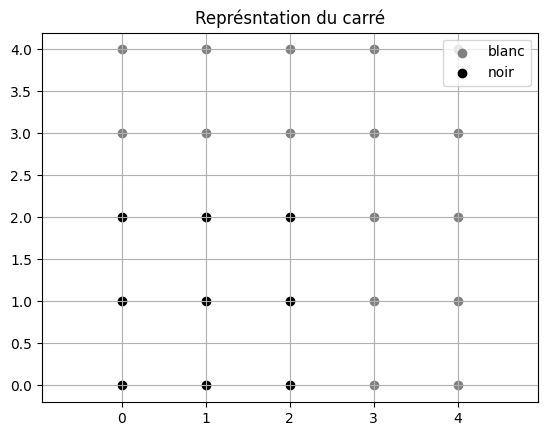

In [19]:
import matplotlib.pyplot as plt

x_blanc = [i for i in range(5)] + [i for i in range(5)
                                   ] + 3 * [i for i in range(3, 5)]
y_blanc = 5 * [4] + 5 * [3] + [2, 2, 1, 1, 0, 0]

x_noir = 3 * [0] + 3 * [1] + 3 * [2]
y_noir = 3 * [i for i in range(3)]

plt.axis('equal')
plt.title('Représntation du carré')
plt.grid()
plt.scatter(x_blanc, y_blanc, label='blanc', color='grey')
plt.scatter(x_noir, y_noir, label='noir', color='black')
plt.legend()
plt.show()

## 1. déterminé les régions du plan dont les points sont classés en noir par l'algorithme des k plus porches voisins , pour k = 1 avec la dislence euclidienne. 

Même si ce n'ait pas demandé, nous le programmons:
On remplacera blanc par bleu et noir par rouge pour des questions de convention.  

In [20]:
import numpy as np
import plotly.graph_objects as go
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

In [21]:
X = np.array([[0.,4.], [1.,4.], [2.,4.], [3.,4.], [4.,4.],
              [0.,3.], [1.,3.], [2.,3.], [3.,3.], [4.,3.],
              [0.,2.], [1.,2.], [2.,2.], [3.,2.], [4.,2.],
              [0.,1.], [1.,1.], [2.,1.], [3.,1.], [4.,1.],
              [0.,0.], [1.,0.], [2.,0.], [3.,0.], [4.,0.]])

y = np.array([0, 0, 0, 0, 0,
              0, 0, 0, 0, 0,
              1, 1, 1, 0, 0,
              1, 1, 1, 0, 0,
              1, 1, 1, 0, 0])

In [22]:
grid_unit_size = .02

x_min = X[:, 0].min() 
x_max = X[:, 0].max() 
y_min = X[:, 1].min() 
y_max = X[:, 1].max() 

x_range = np.arange(start = x_min, stop = x_max + grid_unit_size, step = grid_unit_size)
y_range = np.arange(start = y_min, stop = y_max + grid_unit_size, step = grid_unit_size)

x_gridvalues, y_gridvalues = np.meshgrid(x_range, y_range)

In [23]:
knn_classifier = KNeighborsClassifier(1, weights='uniform')
knn_classifier.fit(X, y)

gridvalues_combined_tidy = np.vstack([x_gridvalues.flatten(), y_gridvalues.flatten()]).T
knn_class_probabilities = knn_classifier.predict_proba(gridvalues_combined_tidy)
probability_postive_class = knn_class_probabilities[:,1]

In [24]:
fig = go.Figure(data=[
    go.Contour(
        x = x_range
        ,y = y_range
        ,z = probability_postive_class.reshape(x_gridvalues.shape)
        ,colorscale = 'RdBu'
    )
])

fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )

fig.show()

## 2. Reprendre la question précédente pour k = 3, k = 5, k = 9. Comment évolue les diférentes valeurs de k la forme la séparation entre la zone dont les points sont classés en blanc 

On reprend le programme de la dernière question :

In [25]:
def knn(k, X, y, grid_unit_size=.02):
    
    x_min = X[:, 0].min() 
    x_max = X[:, 0].max() 
    y_min = X[:, 1].min() 
    y_max = X[:, 1].max() 

    x_range = np.arange(start = x_min, stop = x_max + grid_unit_size, step = grid_unit_size)
    y_range = np.arange(start = y_min, stop = y_max + grid_unit_size, step = grid_unit_size)
    x_gridvalues, y_gridvalues = np.meshgrid(x_range, y_range)
    
    knn_classifier = KNeighborsClassifier(k, weights='uniform')
    knn_classifier.fit(X, y)

    gridvalues_combined_tidy = np.vstack([x_gridvalues.flatten(), y_gridvalues.flatten()]).T
    knn_class_probabilities = knn_classifier.predict_proba(gridvalues_combined_tidy)
    probability_postive_class = knn_class_probabilities[:,1]
    
    fig = go.Figure(data=[
        go.Contour(
            x = x_range
            ,y = y_range
            ,z = probability_postive_class.reshape(x_gridvalues.shape)
            ,colorscale = 'RdBu'
        )
    ])

    fig.update_yaxes(
        scaleanchor = "x",
        scaleratio = 1,
      )

    return fig.show()

In [26]:
# k = 3
knn(3, X, y)

In [27]:
# k = 5
knn(5, X, y)

In [28]:
# k = 9
knn(9, X, y)

La forme évolue de plus en plus anarchiquement lorceque l'on augmente le k, déjà à k = 5, ça n'a plus grand sens, mais k = 9 en a encore moin. Cependent, le k = 3 parait assez satisfaisant.  